## Name: Hammad Raza
### Email : hammad.razikhan@gmail.com
### Assignment No.3 Wednesday 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import time
import matplotlib.colors as mcolors
from matplotlib.gridspec import GridSpec

## Problem 01: “Advanced Plot Customization and Axes Control”
##### Create a multi-axes plot with two different y-axes (dual-axis plot) sharing the same x-axis. Plot two datasets: one on a linear scale and the other on a logarithmic scale, using different y-axes for each. Ensure both axes are fully labeled, with ticks and grid lines corresponding to their respective scales. Explain how you can control the positioning and scaling of each axis independently and implement the solution.

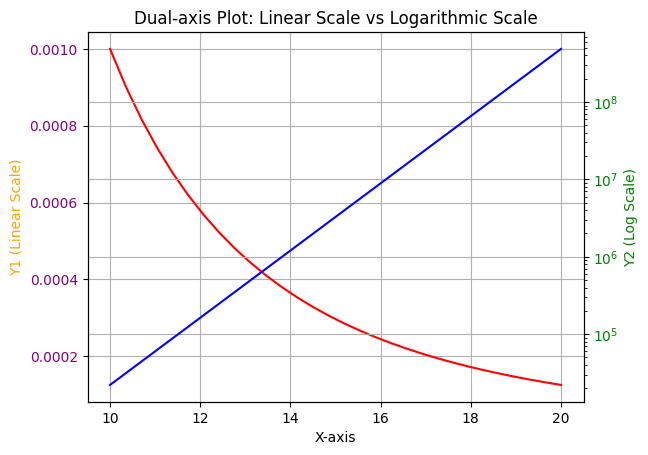

In [25]:
#Creating data for linear and logarithmic scale
data = np.linspace(10, 20, 30)
linear_data = data**-3
logscale_data = np.exp(data)
#Creating a figure and axis
figure, axis = plt.subplots()
#Ploting the first dataset on the primary y-axis(linear scale)
axis.plot(data, linear_data, color='red', label='Linear Scale Data')
axis.set_xlabel('X-axis')
axis.set_ylabel('Y1 (Linear Scale)', color='orange')
axis.tick_params(axis='y', labelcolor='purple')
axis.grid(True)
#Creating a second y-axis sharing the same x-axis
axis2 = axis.twinx() 
axis2.plot(data, logscale_data, color='blue', label='Logarithmic Scale Data')
axis2.set_ylabel('Y2 (Log Scale)', color='green')
axis2.tick_params(axis='y', labelcolor='green')
axis2.set_yscale('log') 
#Setting grids of both datasets
axis.yaxis.grid(True)  
axis2.yaxis.grid(True) 
#Displaying the plot
plt.title('Dual-axis Plot: Linear Scale vs Logarithmic Scale')
plt.show()

## Problem 02: “Interactive Plotting with Widgets”
##### Create an interactive plot using matplotlib.widgets that allows a user to dynamically adjust the parameters of a sine wave (amplitude, frequency and phase shift) using sliders. Ensure that the plot updates in real-time as the sliders are adjusted. Discuss the role of event-driven programming in Matplotlib and the challenges of implementing interactive visualizations.

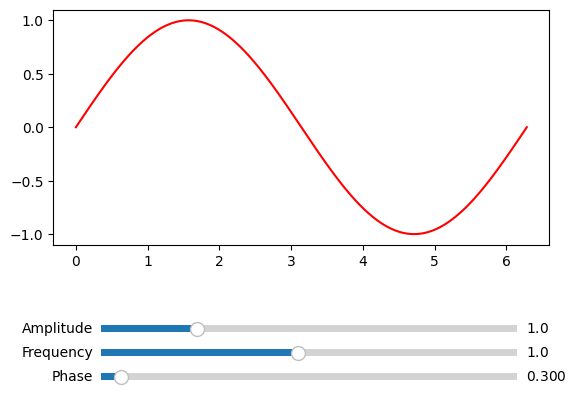

In [38]:
#Creating the figure and axis
x_values = np.linspace(0, 2 * np.pi, 500)
fig, axs = plt.subplots()
plt.subplots_adjust(bottom=0.39)
sine_wave, = axs.plot(x_values, np.sin(x_values), color='red')
#Setting axis limits
axis.set_xlim(0, 2 * np.pi)
axis.set_ylim(-2, 2)
#Creating sliders for amplitude, frequency and phase shift
amplitude_slider = Slider(plt.axes([0.2, 0.2, 0.65, 0.03]), 'Amplitude', 0.1, 4.0, valinit=1)
frequency_slider = Slider(plt.axes([0.2, 0.15, 0.65, 0.03]), 'Frequency', 0.1, 2.0, valinit=1)
phase_slider = Slider(plt.axes([0.2, 0.1, 0.65, 0.03]), 'Phase', 0, 2 * np.pi, valinit=0.3)
#Updating function for the plot
def update_plot(val):
    sine_wave.set_ydata(amplitude_slider.val * np.sin(frequency_slider.val * x_values + phase_slider.val))
    fig.canvas.draw_idle()
#Linking sliders to update function
amplitude_slider.on_changed(update_plot)
frequency_slider.on_changed(update_plot)
phase_slider.on_changed(update_plot)
#Displaying plot
plt.show()

## Problem 03: “3D Visualization with Custom Projections”
##### Create a 3D surface plot using Axes3D where the surface is a mathematical function of your choice (e.g., a Gaussian function). Customize the plot to include a non-standard projection (e.g., cylindrical or spherical projection) and explain how projections affect the interpretation of 3D data. Use color maps to represent an additional dimension of data (e.g., intensity or height).

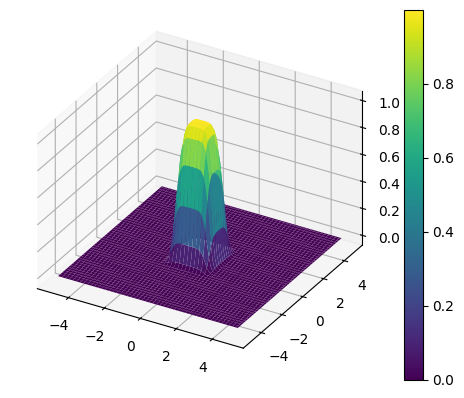

In [53]:
#Creating the figure and 3D axis
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d', proj_type='ortho') 
#Defining X, Y and Gaussian Z function
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
#Applying Gaussian function
Z = np.exp(-(X**6 + Y**4))  
#Plotting the 3D surface with color mapping
surface = ax3.plot_surface(X, Y, Z, cmap='viridis')  
#Adding color bar for representing intensity
fig3.colorbar(surface)
#Displaying Plot
plt.show()

## Problem 04: “Plot Efficiency and Performance Optimization”
##### You are given a dataset with 1 million points. Plot a scatter plot of the data and optimize the performance of your plot to handle such a large dataset efficiently. Experiment with different methods such as downsampling, plotting subsets, using transparency (alpha), or using blitting to improve performance. Measure and compare the time taken for each approach.

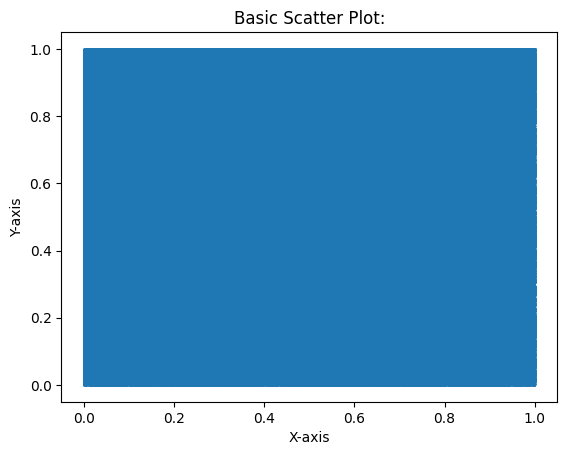

Basic Scatter Plot: took 1.9369 seconds


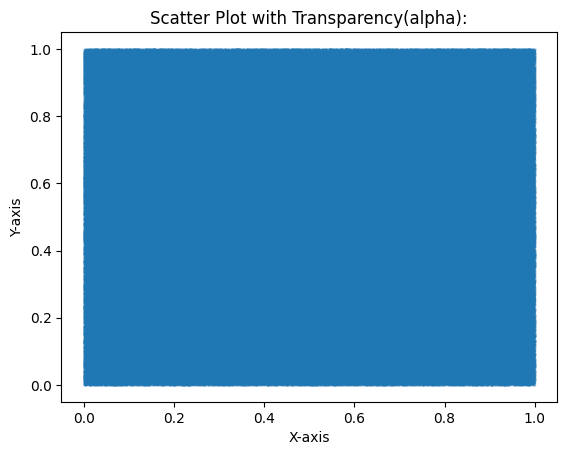

Scatter Plot with Transparency(alpha): took 1.8297 seconds


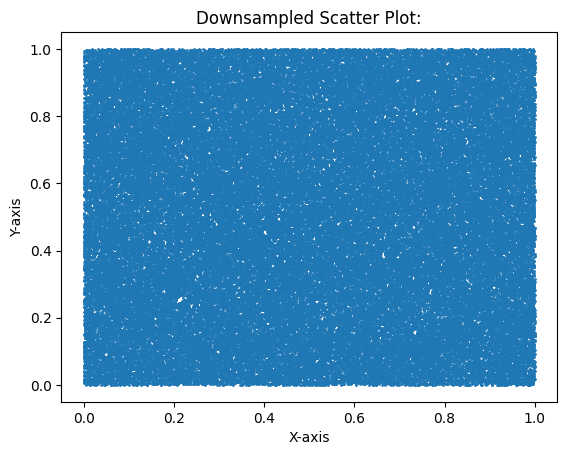

Downsampled Scatter Plot: took 0.5721 seconds


In [7]:
#Generating random dataset with 1 million points
data_size = 1_000_000
x = np.random.rand(data_size)
y = np.random.rand(data_size)
#Function to measure time taken to plot
def measure_time_plot(title, plot_func):
    start_time = time.time()
    plot_func()
    plt.title(title)
    plt.show()
    end_time = time.time()
    print(f"{title} took {end_time - start_time:.4f} seconds")
#Generating Basic Scatter Plot
def basic_plot():
    plt.scatter(x, y, s = 1) 
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
#Generating Scatter Plot with Transparency
def alpha_plot():
    plt.scatter(x, y, alpha=0.1, s=1)  
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
#Generating Downsampled Scatter Plot
def downsampled_plot():
    plt.scatter(x[::10], y[::10], s=1)  
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
#Displaying and measure time for all plots
measure_time_plot("Basic Scatter Plot:", basic_plot)
measure_time_plot("Scatter Plot with Transparency(alpha):", alpha_plot)
measure_time_plot("Downsampled Scatter Plot:", downsampled_plot)

## Problem 05: “Custom Colormaps and Data Normalization”
##### Create a heatmap using a custom colormap that emphasizes specific data ranges (e.g., a colormap that highlights extreme high and low values). Additionally, normalize the data beforeplotting to compress or stretch specific value ranges, making certain data features more visually distinct. Discuss how colormap choice and data normalization affect the interpretation of visualizations.

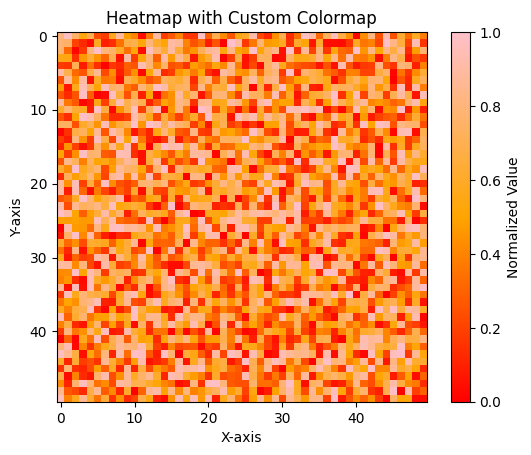

In [49]:
#Generating sample data
data_size1 = 50  
data1 = np.random.rand(data_size1, data_size1) * 400 
#Normalizing the data
data1_min = np.min(data1)
data1_max = np.max(data1)
normalized_data1 = (data1 - data1_min) / (data1_max - data1_min) 
#Creating a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["red", "orange", "pink"], N=512)
#Plotting the heatmap
plt.imshow(normalized_data1, cmap=cmap, interpolation='nearest')
plt.colorbar(label='Normalized Value')  
plt.title("Heatmap with Custom Colormap")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

## Problem 06: “Subplots with Shared Axes and Complex Layouts”
##### Create a grid of subplots (e.g., 2x2) where some of the subplots share their x and/or y axes. Additionally, one of the subplots should span two rows. Customize the layout using GridSpec and explain how you manage subplot spacing, shared axes and aspect ratio across different subplots. Implement a color bar that is shared across multiple subplots.

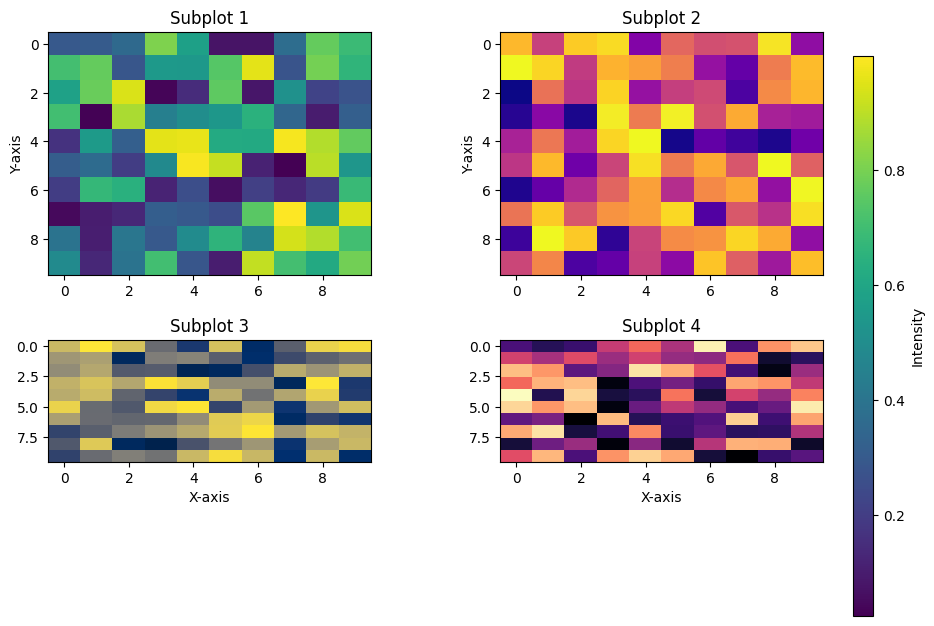

In [35]:
from matplotlib.gridspec import GridSpec

data1 = np.random.rand(10, 10) 
data2 = np.random.rand(10, 10)
data3 = np.random.rand(10, 10)
data4 = np.random.rand(10, 10)  
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(3, 2, height_ratios=[2, 1, 1]) 

ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1])  
ax3 = fig.add_subplot(gs[1, 0]) 
ax4 = fig.add_subplot(gs[1, 1])  

c1 = ax1.imshow(data1, cmap='viridis', aspect='auto')  
ax1.set_title('Subplot 1')

c2 = ax2.imshow(data2, cmap='plasma', aspect='auto')
ax2.set_title('Subplot 2')

c3 = ax3.imshow(data3, cmap='cividis', aspect='auto') 
ax3.set_title('Subplot 3')

c4 = ax4.imshow(data4, cmap='magma', aspect='auto')  
ax4.set_title('Subplot 4')

plt.subplots_adjust(hspace=0.4, wspace=0.4) 

cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7]) 
cbar = fig.colorbar(c1, cax=cbar_ax)
cbar.set_label('Intensity')

ax3.set_xlabel('X-axis')
ax4.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax2.set_ylabel('Y-axis')

plt.show()

## Problem 07: “Interactive Data Visualization with Matplotlib and Widgets”
##### Design an interactive plot using Matplotlib along with Jupyter widgets (such as sliders and dropdowns) to allow users to dynamically adjust parameters of the plot. For example, create a sine wave plot where users can manipulate the frequency and amplitude of the wave through sliders. Discuss how interactive visualizations enhance data analysis and user engagement and implement a solution that demonstrates these capabilities.

## Problem 08: “Advanced Visualization Techniques with Subplots and Annotations”
##### Create a complex visualization using multiple subplots in a single figure that represents different aspects of a dataset. For instance, visualize a dataset containing time series data of temperature and humidity over a year. Include two line plots in separate subplots: one for temperature and one for humidity. Add annotations highlighting key events or significant changes in the data (e.g., seasonal changes) and ensure a shared x-axis for better correlation analysis, with clear labeling for both y-axes. Discuss how to manage multiple subplots effectively and the significance of comparing multiple related variables through subplots in data analysis.

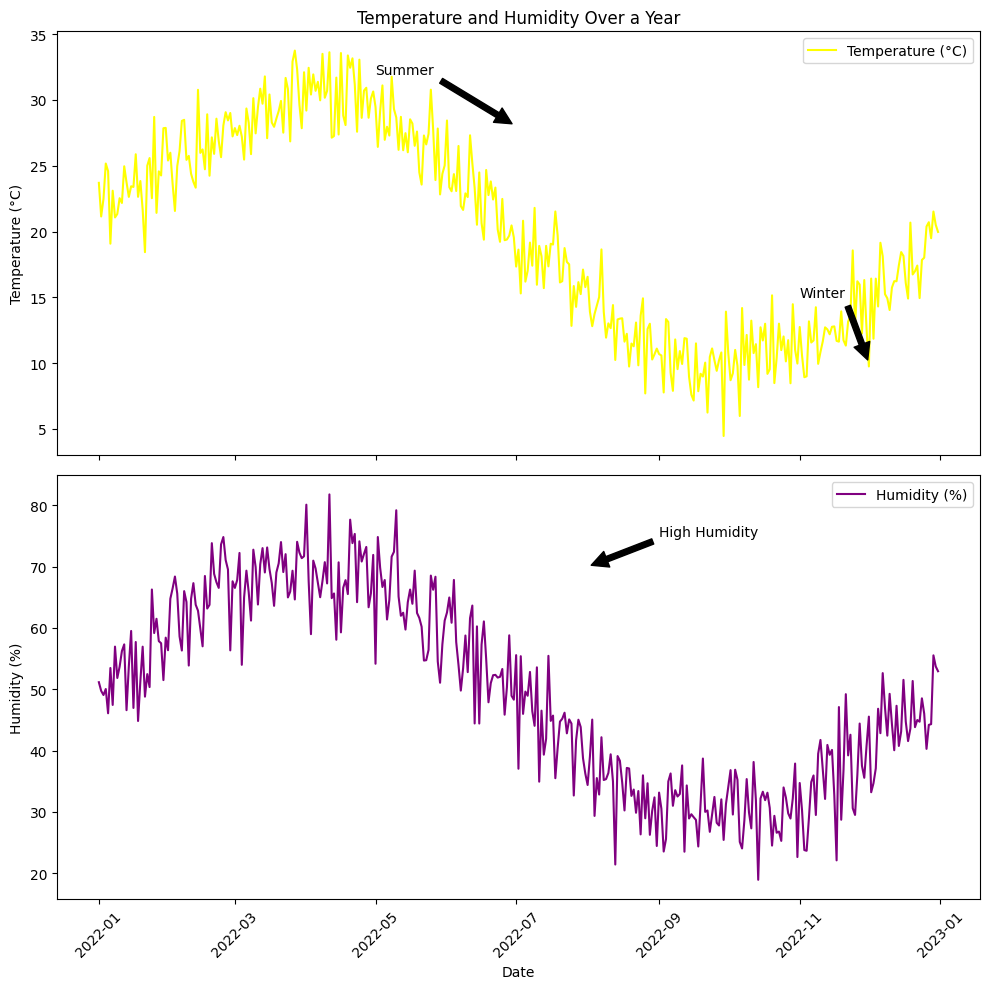

In [51]:
#Generating sample time series data for a year
np.random.seed(0)  
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
temperature = 20 + 10 * np.sin(2 * np.pi * (dates.dayofyear / 365)) + np.random.normal(scale=2, size=len(dates))
humidity = 50 + 20 * np.sin(2 * np.pi * (dates.dayofyear / 365)) + np.random.normal(scale=5, size=len(dates))
#Setting up the figure and subplots
figg, (axx1, axx2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
#Plotting the data
axx1.plot(dates, temperature, color='yellow', label='Temperature (°C)')
axx2.plot(dates, humidity, color='purple', label='Humidity (%)')
#Adding annotations for significant changes
axx1.annotate('Summer', xy=(pd.to_datetime('2022-07-01'), 28), xytext=(pd.to_datetime('2022-05-01'), 32),arrowprops=dict(facecolor='black', shrink=0.05))
axx1.annotate('Winter', xy=(pd.to_datetime('2022-12-01'), 10), xytext=(pd.to_datetime('2022-11-01'), 15),arrowprops=dict(facecolor='black', shrink=0.05))
axx2.annotate('High Humidity', xy=(pd.to_datetime('2022-08-01'), 70), xytext=(pd.to_datetime('2022-09-01'), 75),arrowprops=dict(facecolor='black', shrink=0.05))
#Labelling axes and add titles
axx1.set_ylabel('Temperature (°C)')
axx2.set_ylabel('Humidity (%)')
axx2.set_xlabel('Date')
axx1.set_title('Temperature and Humidity Over a Year')
axx1.legend()
axx2.legend()
#Improving layout
plt.xticks(rotation=45)  
plt.tight_layout()
#Displaying the plot
plt.show()